In [1]:
import os

gestures = [
"like", "dislike", "peace", "one", "fist", "Hello", "Love you"
]

# Create directories for each gesture
for gesture in gestures:
    if not os.path.exists(gesture):
        os.makedirs(gesture)


In [9]:
import cv2
import os

# List of gestures

gestures = [
"like", "dislike", "peace", "one", "fist", "Hello", "Love you"
]

# Define the size to which images will be resized
resize_width = 512
resize_height = 512

# Initialize webcam
cap = cv2.VideoCapture(0)

current_gesture = None
image_count = 0

print("Press the corresponding number key for each gesture to start capturing images:")
for i, gesture in enumerate(gestures):
    print(f"{i + 1} - {gesture}")
print("Press 'q' to quit.")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Display instructions on the frame
    cv2.putText(frame, "Press 'q' to quit.", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    if current_gesture is not None:
        cv2.putText(frame, f"Current Gesture: {current_gesture}", (10, 70), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
        cv2.putText(frame, f"Image Count: {image_count}", (10, 110), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

    cv2.imshow("Frame", frame)

    key = cv2.waitKey(1) & 0xFF

    if key == ord('q'):
        break
    elif ord('1') <= key <= ord('9'):
        index = key - ord('1')
        if index < len(gestures):
            current_gesture = gestures[index]
            image_count = 0
    elif ord('a') <= key <= ord('f'):
        index = ord('9') - ord('0') + (key - ord('a')) + 1
        if index < len(gestures):
            current_gesture = gestures[index]
            image_count = 0

    if current_gesture is not None:
        # Resize the frame
        resized_frame = cv2.resize(frame, (resize_width, resize_height))

        # Save the image
        image_path = os.path.join(current_gesture, f"{image_count}.jpg")
        cv2.imwrite(image_path, resized_frame)
        image_count += 1

cap.release()
cv2.destroyAllWindows()


Press the corresponding number key for each gesture to start capturing images:
1 - like
2 - dislike
3 - peace
4 - one
5 - fist
6 - Hello
7 - Love you
Press 'q' to quit.


In [18]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical

# Define the size to which images will be resized
resize_width = 128
resize_height = 128

# List of gestures
gestures = [
    "call", "dislike", "first", "four", "like", "mute", "ok", "palm",
    "peace", "peace_inverted", "rock", "stop", "stop_inverted", "three",
    "two_up", "two_inverted"
]

# Load images and labels
def load_images_from_folder(folder):
    images = []
    labels = []
    for gesture_index, gesture in enumerate(gestures):
        gesture_folder = os.path.join(folder, gesture)
        if os.path.exists(gesture_folder):
            for filename in os.listdir(gesture_folder):
                img_path = os.path.join(gesture_folder, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, (resize_width, resize_height))
                    images.append(img)
                    labels.append(gesture_index)
    return np.array(images), np.array(labels)

# Load the dataset
images, labels = load_images_from_folder(".")

# Normalize the images
images = images.astype("float32") / 255.0

# One-hot encode the labels
labels = to_categorical(labels, num_classes=len(gestures))

print(f"Loaded {images.shape[0]} images for training.")


Loaded 4905 images for training.


In [19]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")


Training set: 3924 samples
Validation set: 981 samples


In [21]:
import cv2
import numpy as np

def preprocess_image(img):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Thresholding to create a binary mask
    _, thresh = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if contours:
        # Assume the largest contour is the hand
        largest_contour = max(contours, key=cv2.contourArea)
        mask = np.zeros_like(gray)
        cv2.drawContours(mask, [largest_contour], -1, 255, thickness=cv2.FILLED)

        # Apply mask to original image
        fg_image = cv2.bitwise_and(img, img, mask=mask)

        return fg_image
    else:
        # Return the original image if no contour is found
        return img


Epoch 1/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 38s 298ms/step - accuracy: 0.3221 - loss: 1.8986 - val_accuracy: 0.9755 - val_loss: 0.0965
Epoch 2/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 32s 259ms/step - accuracy: 0.9263 - loss: 0.2191 - val_accuracy: 0.9990 - val_loss: 0.0105
Epoch 3/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 32s 260ms/step - accuracy: 0.9698 - loss: 0.0828 - val_accuracy: 1.0000 - val_loss: 0.0034
Epoch 4/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 30s 245ms/step - accuracy: 0.9880 - loss: 0.0371 - val_accuracy: 1.0000 - val_loss: 0.0028
Epoch 5/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 30s 246ms/step - accuracy: 0.9903 - loss: 0.0269 - val_accuracy: 1.0000 - val_loss: 4.5463e-04


In [22]:
import cv2
import numpy as np

def preprocess_image(img):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Background subtraction
    back_sub = cv2.createBackgroundSubtractorMOG2()
    fg_mask = back_sub.apply(gray)

    # Apply mask to the original image
    fg_image = cv2.bitwise_and(img, img, mask=fg_mask)

    # Resize the image
    resized_img = cv2.resize(fg_image, (resize_width, resize_height))

    return resized_img


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 1.0000 - loss: 5.4075e-04
Validation Loss: 0.0004546341369859874
Validation Accuracy: 1.0


In [38]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical

# Define the size to which images will be resized
resize_width = 128
resize_height = 128

# List of gestures
gestures = [
    "call", "dislike", "first", "four", "like", "mute", "ok", "palm",
    "peace", "peace_inverted", "rock", "stop", "stop_inverted", "three",
    "two_up", "two_inverted"
]

# Load images and labels
def load_images_from_folder(folder):
    images = []
    labels = []
    for gesture_index, gesture in enumerate(gestures):
        gesture_folder = os.path.join(folder, gesture)
        if os.path.exists(gesture_folder):
            print(f"Loading images from: {gesture_folder}")
            for filename in os.listdir(gesture_folder):
                img_path = os.path.join(gesture_folder, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, (resize_width, resize_height))
                    images.append(img)
                    labels.append(gesture_index)
                else:
                    print(f"Failed to load image: {img_path}")
        else:
            print(f"Gesture folder not found: {gesture_folder}")
    return np.array(images), np.array(labels)

# Load the dataset
dataset_path = "."  # Change this to the actual path if different
images, labels = load_images_from_folder(dataset_path)

# Check if images and labels were loaded
if images.size == 0:
    print("No images were loaded. Please check the dataset path and folder structure.")
else:
    # Normalize the images
    images = images.astype("float32") / 255.0

    # One-hot encode the labels
    labels = to_categorical(labels, num_classes=len(gestures))

    print(f"Loaded {images.shape[0]} images for training.")


Loading images from: .\call
Loading images from: .\dislike
Loading images from: .\first
Loading images from: .\four
Loading images from: .\like
Loading images from: .\mute
Loading images from: .\ok
Loading images from: .\palm
Loading images from: .\peace
Loading images from: .\peace_inverted
Loading images from: .\rock
Loading images from: .\stop
Loading images from: .\stop_inverted
Loading images from: .\three
Loading images from: .\two_up
Loading images from: .\two_inverted
Loaded 4905 images for training.


In [39]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")


Training set: 3924 samples
Validation set: 981 samples


In [40]:
from tensorflow.keras.layers import Conv2D, MaxPool2D
INPUT_SHAPE = (128, 128, 3)  # Change to RGB input shape

# Initialize the model
model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Convolutional Layer 2
model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Convolutional Layer 3
model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten and Dense Layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(len(gestures), activation='softmax'))  # Output layer with the number of gesture classes

# Compile the model
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=METRICS)

# Model summary
model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_31 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 128, 128, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_27               │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,485,296 (17.11 MB)

 Trainable params: 4,484,400 (17.11 MB)

 Non-trainable params: 896 (3.50 KB)

In [41]:
# Data augmentation
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_train, batch_size=batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

# Fit the model
history = model.fit(
    train_generator,
    epochs=5,
    steps_per_epoch=steps_per_epoch,
    validation_data=(X_val, y_val)
)

# Save the model
# model.save('gesture_recognition_model.h5')


Epoch 1/5
122/122 ━━━━━━━━━━━━━━━━━━━━ 221s 2s/step - accuracy: 0.3456 - loss: 4.3523 - precision: 0.5046 - recall: 0.2439 - val_accuracy: 0.0928 - val_loss: 18.1882 - val_precision: 0.0907 - val_recall: 0.0897
Epoch 2/5
122/122 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - accuracy: 0.5000 - loss: 1.7148 - precision: 0.8000 - recall: 0.2500 - val_accuracy: 0.0856 - val_loss: 18.3088 - val_precision: 0.0865 - val_recall: 0.0856
Epoch 3/5
122/122 ━━━━━━━━━━━━━━━━━━━━ 182s 1s/step - accuracy: 0.5594 - loss: 1.2426 - precision: 0.7836 - recall: 0.4332 - val_accuracy: 0.1600 - val_loss: 9.7341 - val_precision: 0.1618 - val_recall: 0.1590
Epoch 4/5
122/122 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - accuracy: 0.7188 - loss: 0.9906 - precision: 0.8636 - recall: 0.5938 - val_accuracy: 0.1081 - val_loss: 8.5405 - val_precision: 0.1024 - val_recall: 0.1009
Epoch 5/5
122/122 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step - accuracy: 0.6708 - loss: 0.8559 - precision: 0.7925 - recall: 0.5820 - val_accuracy: 0.4577 - val_loss:

In [42]:
model.save('gesture_recognition_model.h5')


In [34]:
import cv2
import numpy as np

def preprocess_image(img):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Background subtraction
    back_sub = cv2.createBackgroundSubtractorMOG2()
    fg_mask = back_sub.apply(gray)

    # Apply mask to the original image
    fg_image = cv2.bitwise_and(img, img, mask=fg_mask)

    # Resize the image
    resized_img = cv2.resize(fg_image, (resize_width, resize_height))

    return resized_img


In [35]:
import cv2
import numpy as np

def preprocess_image(img):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Thresholding to create a binary mask
    _, thresh = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if contours:
        # Assume the largest contour is the hand
        largest_contour = max(contours, key=cv2.contourArea)
        mask = np.zeros_like(gray)
        cv2.drawContours(mask, [largest_contour], -1, 255, thickness=cv2.FILLED)

        # Apply mask to original image
        fg_image = cv2.bitwise_and(img, img, mask=mask)

        return fg_image
    else:
        # Return the original image if no contour is found
        return img


In [36]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for gesture_index, gesture in enumerate(gestures):
        gesture_folder = os.path.join(folder, gesture)
        if os.path.exists(gesture_folder):
            for filename in os.listdir(gesture_folder):
                img_path = os.path.join(gesture_folder, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img = preprocess_image(img)
                    img = cv2.resize(img, (resize_width, resize_height))
                    images.append(img)
                    labels.append(gesture_index)
    return np.array(images), np.array(labels)


In [37]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the size to which images will be resized
resize_width = 128
resize_height = 128

# List of gestures
gestures = [
    "call", "dislike", "first", "four", "like", "mute", "ok", "palm",
    "peace", "peace_inverted", "rock", "stop", "stop_inverted", "three",
    "two_up", "two_inverted"
]

def preprocess_image(img):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Thresholding to create a binary mask
    _, thresh = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if contours:
        # Assume the largest contour is the hand
        largest_contour = max(contours, key=cv2.contourArea)
        mask = np.zeros_like(gray)
        cv2.drawContours(mask, [largest_contour], -1, 255, thickness=cv2.FILLED)

        # Apply mask to original image
        fg_image = cv2.bitwise_and(img, img, mask=mask)

        return fg_image
    else:
        # Return the original image if no contour is found
        return img

# Load images and labels
def load_images_from_folder(folder):
    images = []
    labels = []
    for gesture_index, gesture in enumerate(gestures):
        gesture_folder = os.path.join(folder, gesture)
        if os.path.exists(gesture_folder):
            for filename in os.listdir(gesture_folder):
                img_path = os.path.join(gesture_folder, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img = preprocess_image(img)
                    img = cv2.resize(img, (resize_width, resize_height))
                    images.append(img)
                    labels.append(gesture_index)
    return np.array(images), np.array(labels)

# Load the dataset
images, labels = load_images_from_folder(".")

# Normalize the images
images = images.astype("float32") / 255.0

# One-hot encode the labels
labels = to_categorical(labels, num_classes=len(gestures))

print(f"Loaded {images.shape[0]} images for training.")

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(resize_width, resize_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(gestures), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))

# Save the model
model.save('gesture_recognition_model.h5')

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


Loaded 4905 images for training.
Training set: 3924 samples
Validation set: 981 samples
Epoch 1/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 32s 245ms/step - accuracy: 0.4809 - loss: 1.5364 - val_accuracy: 0.9888 - val_loss: 0.0325
Epoch 2/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 29s 238ms/step - accuracy: 0.9736 - loss: 0.0879 - val_accuracy: 1.0000 - val_loss: 0.0055
Epoch 3/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 29s 239ms/step - accuracy: 0.9867 - loss: 0.0356 - val_accuracy: 0.9980 - val_loss: 0.0059
Epoch 4/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 29s 239ms/step - accuracy: 0.9909 - loss: 0.0242 - val_accuracy: 1.0000 - val_loss: 6.1311e-04
Epoch 5/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 28s 229ms/step - accuracy: 0.9984 - loss: 0.0084 - val_accuracy: 1.0000 - val_loss: 6.6076e-04


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 1.0000 - loss: 5.2729e-04
Validation Loss: 0.0006607609102502465
Validation Accuracy: 1.0


In [5]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical

# Define the size to which images will be resized
resize_width = 128
resize_height = 128

# List of gestures
gestures = [
    "call_me", "fingers_crossed", "okay", "paper", "peace", "rock", "rock_on", "scissor", "thumbs", "up",
    "two_up", "two_inverted"
]

# Load images and labels
def load_images_from_folder(folder):
    images = []
    labels = []
    for gesture_index, gesture in enumerate(gestures):
        gesture_folder = os.path.join(folder, gesture)
        if os.path.exists(gesture_folder):
            for filename in os.listdir(gesture_folder):
                img_path = os.path.join(gesture_folder, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, (resize_width, resize_height))
                    images.append(img)
                    labels.append(gesture_index)
    return np.array(images), np.array(labels)

# Load the dataset
images, labels = load_images_from_folder("images/.")

# Normalize the images
images = images.astype("float32") / 255.0

# One-hot encode the labels
labels = to_categorical(labels, num_classes=len(gestures))

print(f"Loaded {images.shape[0]} images for training.")


Loaded 5243 images for training.


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


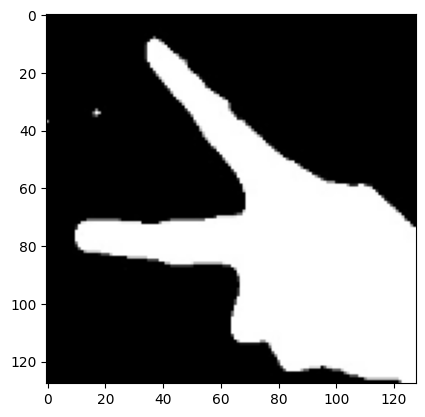

In [17]:
import matplotlib.pyplot as plt
plt.imshow(images[4110])
print(labels[4110])

In [24]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_test.shape[0]} samples")

Training set: 4194 samples
Validation set: 1049 samples


In [25]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # For data augmentation
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(resize_width, resize_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(gestures), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_train, batch_size=batch_size)
steps_per_epoch = X_train.shape[0] // batch_size


# Train the model
# history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))
# Fit the model
r = model.fit(
    train_generator,
    epochs=10,
    steps_per_epoch=steps_per_epoch,
    validation_data=(X_test, y_test)
)



# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

Epoch 1/10


C:\Users\PMYLS\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


131/131 ━━━━━━━━━━━━━━━━━━━━ 43s 306ms/step - accuracy: 0.2836 - loss: 1.9772 - val_accuracy: 0.8561 - val_loss: 0.5548
Epoch 2/10
  1/131 ━━━━━━━━━━━━━━━━━━━━ 32s 251ms/step - accuracy: 0.6875 - loss: 0.9831

C:\Program Files\Python312\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6875 - loss: 0.9831 - val_accuracy: 0.8608 - val_loss: 0.5390
Epoch 3/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 44s 336ms/step - accuracy: 0.7134 - loss: 0.8334 - val_accuracy: 0.9285 - val_loss: 0.2528
Epoch 4/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.7500 - loss: 0.7327 - val_accuracy: 0.9361 - val_loss: 0.2531
Epoch 5/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 41s 306ms/step - accuracy: 0.7908 - loss: 0.6020 - val_accuracy: 0.9523 - val_loss: 0.1817
Epoch 6/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7812 - loss: 0.6065 - val_accuracy: 0.9542 - val_loss: 0.1779
Epoch 7/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 40s 300ms/step - accuracy: 0.8375 - loss: 0.4946 - val_accuracy: 0.9542 - val_loss: 0.1473
Epoch 8/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9062 - loss: 0.3814 - val_accuracy: 0.9571 - val_loss: 0.1468
Epoch 9/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 38s 287ms/step - accuracy: 0.8603 - loss: 0.4289 - val_accurac

In [26]:

# Save the model
model.save('gesture_recognition_model.h5')

In [25]:
import os
import cv2

# Path to the folder containing the images
folder_path = "D:/X/AI/Internships/Prodigy InfoTech/Tasks/4 Hand Gesture Recognition/peace"

# Define the target size for resizing
target_width = 128
target_height = 128

# Function to resize images
def resize_image(image_path, target_size):
    image = cv2.imread(image_path)
    if image is not None:
        resized_image = cv2.resize(image, target_size)
        cv2.imwrite(image_path, resized_image)

# Loop through the files in the directory
for filename in os.listdir(folder_path):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        # Get the full path of the image
        file_path = os.path.join(folder_path, filename)

        # Resize the image
        resize_image(file_path, (target_width, target_height))

print("Processing complete!")


Processing complete!


In [27]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical

# Define the size to which images will be resized
resize_width = 128
resize_height = 128

# List of gestures
gestures = [
"like", "dislike", "peace", "one", "fist", "Hello", "Love you"
]

# Load images and labels
def load_images_from_folder(folder):
    images = []
    labels = []
    for gesture_index, gesture in enumerate(gestures):
        gesture_folder = os.path.join(folder, gesture)
        if os.path.exists(gesture_folder):
            for filename in os.listdir(gesture_folder):
                img_path = os.path.join(gesture_folder, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, (resize_width, resize_height))
                    images.append(img)
                    labels.append(gesture_index)
    return np.array(images), np.array(labels)

# Load the dataset
images, labels = load_images_from_folder(".")

# Normalize the images
images = images.astype("float32") / 255.0

# One-hot encode the labels
labels = to_categorical(labels, num_classes=len(gestures))

print(f"Loaded {images.shape[0]} images for training.")


Loaded 3927 images for training.


In [28]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")


Training set: 3141 samples
Validation set: 786 samples


In [29]:
import cv2
import numpy as np

def preprocess_image(img):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Thresholding to create a binary mask
    _, thresh = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if contours:
        # Assume the largest contour is the hand
        largest_contour = max(contours, key=cv2.contourArea)
        mask = np.zeros_like(gray)
        cv2.drawContours(mask, [largest_contour], -1, 255, thickness=cv2.FILLED)

        # Apply mask to original image
        fg_image = cv2.bitwise_and(img, img, mask=mask)

        return fg_image
    else:
        # Return the original image if no contour is found
        return img


In [31]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # For data augmentation
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(resize_width, resize_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(gestures), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
# history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))

# Save the model
# model.save('gesture_recognition_model.h5')

# Evaluate the model on the validation set
# val_loss, val_accuracy = model.evaluate(X_val, y_val)
# print(f"Validation Loss: {val_loss}")
# print(f"Validation Accuracy: {val_accuracy}")


C:\Users\PMYLS\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
# Data augmentation
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_train, batch_size=batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

# Fit the model
history = model.fit(
    train_generator,
    epochs=50,
    steps_per_epoch=steps_per_epoch,
    validation_data=(X_val, y_val)
)

# Save the model
# model.save('gesture_recognition_model.h5')


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 37s 368ms/step - accuracy: 0.8438 - loss: 0.4536 - val_accuracy: 0.9478 - val_loss: 0.1786
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.8438 - loss: 0.4193 - val_accuracy: 0.9338 - val_loss: 0.2144
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 33s 328ms/step - accuracy: 0.8369 - loss: 0.4675 - val_accuracy: 0.9275 - val_loss: 0.2032
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7812 - loss: 0.4153 - val_accuracy: 0.9275 - val_loss: 0.1979
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 31s 307ms/step - accuracy: 0.8764 - loss: 0.3322 - val_accuracy: 0.9962 - val_loss: 0.0794
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8438 - loss: 0.4386 - val_accuracy: 0.9860 - val_loss: 0.0842
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 33s 324ms/step - accuracy: 0.9112 - loss: 0.2718 - val_accuracy: 0.9567 - val_loss: 0.1425
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8750 - loss: 0.3410 - val_accuracy: 0.

In [34]:
model.save('gesture_recognition_model.h5')
